## Ensemble Methods in Machine Learning

In [1]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error


# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = model.predict(X_test)


rmse_avg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
mae_avg = mean_absolute_error(y_test, y_pred_lin_reg)
median_ae_avg = median_absolute_error(y_test, y_pred_lin_reg)
mape_avg = mean_absolute_percentage_error(y_test, y_pred_lin_reg)
r2_avg = r2_score(y_test, y_pred_lin_reg)

print(f"""
RMSE: {rmse_avg:.2f}, 
MAE:  {mae_avg:.2f}, 
MdAE: {median_ae_avg:.2f}, 
MAPE: {mape_avg:.2f}, 
R2:   {r2_avg:.2f}""" )



RMSE: 0.40, 
MAE:  0.32, 
MdAE: 0.27, 
MAPE: 0.03, 
R2:   1.00


## Blending (Ensemble Learning)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error

# Initialize the base models
models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge(alpha=1)),
    ('lasso', Lasso(alpha=0.1)),
    # ('elasticnet', ElasticNet(alpha=1, l1_ratio=0.5)),
    ('huber', HuberRegressor()),
    ('ransac', RANSACRegressor()),
    ('theil', TheilSenRegressor())
]

# Train models and collect predictions
predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# Average predictions
y_pred_avg = np.mean(predictions, axis=0)

# Evaluate the averaged predictions
rmse_avg = np.sqrt(mean_squared_error(y_test, y_pred_avg))
mae_avg = mean_absolute_error(y_test, y_pred_avg)
median_ae_avg = median_absolute_error(y_test, y_pred_avg)
mape_avg = mean_absolute_percentage_error(y_test, y_pred_avg)
r2_avg = r2_score(y_test, y_pred_avg)

# Store results for comparison
results_avg = {
    'Model': 'Averaging',
    'RMSE': rmse_avg,
    'MAE': mae_avg,
    'MedianAE': median_ae_avg,
    'MAPE': mape_avg,
    'R2': r2_avg
}

# Compare with individual models
results_individual = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results_individual.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MedianAE': median_ae,
        'MAPE': mape,
        'R2': r2
    })

# Add averaging results to individual results
results_individual.append(results_avg)

# Create a DataFrame to display results
results_df = pd.DataFrame(results_individual)
results_df_sorted = results_df.sort_values(by='MAPE', ascending=True)
results_df_sorted

,Model,RMSE,MAE,MedianAE,MAPE,R2
2,lasso,0.443713,0.358940,0.315233,0.019843,0.999993
6,Averaging,0.399424,0.326221,0.273424,0.024653,0.999994
4,ransac,0.397667,0.320830,0.273486,0.025483,0.999994
0,linear,0.397667,0.320830,0.273486,0.025483,0.999994
5,theil,0.398694,0.323127,0.269344,0.025737,0.999994
1,ridge,0.443523,0.361875,0.306049,0.025893,0.999993
3,huber,0.398379,0.322028,0.274037,0.026170,0.999994


In [3]:
y_pred_avg = np.mean(predictions, axis=0)
y_pred_avg

array([ 4.52502453e+01,  5.35087020e+01, -6.72202050e+01, -1.69799597e+02,
       -1.26539807e+00,  6.99356409e+01, -1.54468529e+02,  7.45087039e+01,
        2.43809983e+01,  3.18558009e+01, -1.53610704e+02,  1.16228846e+02,
        5.67947986e+01, -2.31070645e+02,  7.87611913e+01,  6.66526784e+01,
       -1.86067568e+02, -1.68789521e+02,  2.77201316e+02,  1.18103837e+01,
       -5.47777674e+01,  1.83766740e+01,  6.47205956e+01,  3.26175052e+02,
       -1.34151710e+02,  2.66540234e+02,  8.51875892e+01,  4.29963746e+00,
       -5.13499247e+02, -1.63641307e+02, -2.43545825e+02, -3.60101981e+02,
       -3.92992181e+01,  3.71182535e+02, -3.47753550e+00, -1.34057810e+02,
       -1.53421496e+02,  9.71924926e+01, -1.14252541e+02,  8.75807027e+00,
        1.53700378e+02, -7.94604528e+01,  6.48901661e+01, -1.15600383e+02,
        3.71226494e+01, -1.38348032e+02, -8.39261236e+01, -1.56430599e+02,
        1.06765372e+02,  1.51328710e+02,  2.56596517e+02, -1.12796471e+02,
       -2.28602296e+02,  

In [4]:
# Transpose the list to have predictions as columns
predictions_transposed = list(map(list, zip(*predictions)))

# Create a DataFrame with model predictions as columns
model_names = [f'Model_{i+1}' for i in range(len(predictions))]
predictions_df = pd.DataFrame(predictions_transposed, columns=model_names)

# Display the DataFrame
display(predictions_df)



,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6
0,45.273190,45.186793,45.198632,45.296469,45.273190,45.273199
1,53.541258,53.462357,53.399477,53.557928,53.541258,53.549934
2,-67.290441,-67.185825,-67.060019,-67.263225,-67.290441,-67.231279
3,-169.849909,-169.640109,-169.735428,-169.837365,-169.849909,-169.884860
4,-1.288842,-1.317155,-1.096420,-1.318591,-1.288842,-1.282539
...,...,...,...,...,...,...
195,105.781961,105.635101,105.591710,105.757246,105.781961,105.800069
196,105.651721,105.547623,105.485431,105.684383,105.651721,105.643100
197,67.494570,67.390469,67.324914,67.510995,67.494570,67.488742
198,154.986985,154.800855,154.624421,155.004849,154.986985,154.970996


In [5]:
y_pred_mean = predictions_df.mean(axis=1)

rmse_avg = np.sqrt(mean_squared_error(y_test, y_pred_mean))
mae_avg = mean_absolute_error(y_test, y_pred_mean)
median_ae_avg = median_absolute_error(y_test, y_pred_mean)
mape_avg = mean_absolute_percentage_error(y_test, y_pred_mean)
r2_avg = r2_score(y_test, y_pred_mean)

print(f"""
RMSE: {rmse_avg:.4f}, 
MAE:  {mae_avg:.4f}, 
MdAE: {median_ae_avg:.4f}, 
MAPE: {mape_avg:.4f}, 
R2:   {r2_avg:.4f}""" )


RMSE: 0.3994, 
MAE:  0.3262, 
MdAE: 0.2734, 
MAPE: 0.0247, 
R2:   1.0000


In [6]:
predictions

[array([ 4.52731895e+01,  5.35412582e+01, -6.72904410e+01, -1.69849909e+02,
        -1.28884209e+00,  6.99772148e+01, -1.54543588e+02,  7.45518582e+01,
         2.43964754e+01,  3.18736482e+01, -1.53670141e+02,  1.16311427e+02,
         5.68537933e+01, -2.31177052e+02,  7.87839549e+01,  6.66846024e+01,
        -1.86156805e+02, -1.68881077e+02,  2.77359893e+02,  1.18378407e+01,
        -5.47843565e+01,  1.84095809e+01,  6.47856521e+01,  3.26334987e+02,
        -1.34206907e+02,  2.66621650e+02,  8.52279133e+01,  4.30065291e+00,
        -5.13681228e+02, -1.63688562e+02, -2.43639818e+02, -3.60243101e+02,
        -3.93058527e+01,  3.71341633e+02, -3.48307496e+00, -1.34103498e+02,
        -1.53449510e+02,  9.72648717e+01, -1.14302323e+02,  8.75680129e+00,
         1.53793632e+02, -7.94842216e+01,  6.48948443e+01, -1.15639067e+02,
         3.71788514e+01, -1.38432044e+02, -8.39762785e+01, -1.56530784e+02,
         1.06801205e+02,  1.51399021e+02,  2.56677523e+02, -1.12863341e+02,
        -2.2

### Blending Using Sklearn

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
# # Create a synthetic regression dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.4, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models as pipelines
linear_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('model', LinearRegression())])

ridge_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])

lasso_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', Lasso(alpha=0.1))])

huber_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', HuberRegressor())])

ransac_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', RANSACRegressor())])

# Combine models using VotingRegressor for blending
voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_pipeline),
    ('ridge', ridge_pipeline),
    ('lasso', lasso_pipeline),
    ('huber', huber_pipeline),
    # ('ransac', ransac_pipeline)
])

# Train the ensemble model
voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('linear',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', LinearRegression())])),
                            ('ridge',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', Ridge())])),
                            ('lasso',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', Lasso(alpha=0.1))])),
                            ('huber',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', HuberRegressor())]))])

In [8]:

# Predict using the blended model
y_pred_blend = voting_regressor.predict(X_test)

# Evaluate the blended predictions
rmse_blend = np.sqrt(mean_squared_error(y_test, y_pred_blend))
mae_blend = mean_absolute_error(y_test, y_pred_blend)
median_ae_blend = median_absolute_error(y_test, y_pred_blend)
mape_blend = mean_absolute_percentage_error(y_test, y_pred_blend)
r2_blend = r2_score(y_test, y_pred_blend)

# Store results for comparison
results_blend = {
    'Model': 'Blending (VotingRegressor)',
    'RMSE': rmse_blend,
    'MAE': mae_blend,
    'MedianAE': median_ae_blend,
    'MAPE': mape_blend,
    'R2': r2_blend
}

# Display the results
results_df = pd.DataFrame([results_blend])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Blending (VotingRegressor),0.404801,0.332788,0.284882,0.024136,0.999994


## Sklearn Pipelines

### Without pipeline

In [9]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.4, random_state=42)

# Convert the features into a pandas DataFrame
feature_names = [f'x{i+1}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)

# Convert the target into a pandas Series
y_df = pd.Series(y, name='y')

# Combine features and target into a single DataFrame
data = pd.concat([X_df, y_df], axis=1)
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2, random_state=42)


In [10]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
29,0.365394,0.192652,-1.312163,-0.760364,1.455434,-0.397115,-0.654534,0.382433,0.457213,-1.568144,-2.049515,-0.591018,0.373534,-0.041472,0.440060,-2.378432,-0.039162,-0.393612,-0.762418,-0.393382
535,-0.072329,-0.697079,0.335218,-0.370796,-0.768194,0.943769,-0.701064,-0.162528,-0.845934,1.311602,0.486886,-1.372791,-0.901565,0.924578,-0.503931,0.194839,-0.737626,2.228154,0.193922,-0.731633
695,-1.027404,-1.017764,-0.375634,-1.271919,-1.153492,1.351114,0.644518,1.062657,1.325276,-0.518253,0.928246,0.267844,-0.496532,1.292745,-0.823535,-0.391877,-0.373268,0.211397,0.157974,0.827115
557,-0.604030,-1.326878,0.439843,-1.044667,-0.337026,1.676423,0.673429,-0.010939,0.809542,0.704789,0.161792,0.496249,0.346724,0.726036,1.482833,-0.577004,0.219204,0.454876,-1.503155,0.294016
836,0.590688,0.558558,-0.570397,-0.197108,-0.749667,-1.117586,0.824087,1.757827,1.486151,1.722267,0.303154,-0.334053,-0.635261,1.547641,-1.298742,0.245528,-1.408984,0.758066,-0.223398,0.451700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.007045,-0.789339,0.243005,-0.739371,1.653617,-1.532701,-0.371858,0.950016,0.157761,-1.390222,-0.728462,0.139887,0.319525,-0.196281,0.996118,-0.451949,-0.215610,1.191899,-1.476925,-1.097368
270,0.037563,0.611602,-0.479354,-1.113064,0.656407,0.388647,2.299969,-0.186436,-0.521767,-1.848110,-1.441342,-0.479525,1.289132,-0.268622,1.629319,-0.438427,-0.152019,0.433064,0.412083,-1.208482
860,0.193670,-0.722780,-0.599303,0.496382,-1.467918,0.394644,-0.545614,-1.014917,-0.671211,0.939203,0.481614,0.459161,0.163256,0.358300,-1.100142,1.431589,0.642278,-1.079474,1.372279,-0.161285
435,0.418705,-1.180232,0.604107,-1.530279,-0.946491,-1.617172,-0.333486,-0.908503,0.585021,-0.273007,0.885256,-0.182161,0.879014,0.346313,0.281212,1.140251,-0.013973,-0.122436,1.832561,0.281192


In [11]:

# Standard scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error without pipelines: {mse:.2f}")

Mean Squared Error without pipelines: 0.16


In [12]:
X_train_scaled

array([[ 0.44131325,  0.17804835, -1.30065354, ..., -0.3846608 ,
        -0.69402603, -0.39725969],
       [ 0.01269135, -0.76554074,  0.34562022, ...,  2.24372571,
         0.26460805, -0.74863636],
       [-0.92252485, -1.1056384 , -0.36475378, ...,  0.22187512,
         0.22857418,  0.870599  ],
       ...,
       [ 0.2731596 , -0.79279788, -0.58827249, ..., -1.07225507,
         1.4457918 , -0.1561564 ],
       [ 0.49351514, -1.27794058,  0.61432852, ..., -0.11280043,
         1.90717831,  0.30349123],
       [-1.67479087, -0.50712601,  2.05143194, ..., -0.50311113,
        -0.1680326 ,  0.02051216]])

### Using pipeline

In [13]:
from sklearn.pipeline import Pipeline

# Create a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [14]:
# Predictions
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate the model
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
print(f"Mean Squared Error with pipelines: {mse_pipeline:.2f}")


Mean Squared Error with pipelines: 0.16


## Stacking using Sklearn

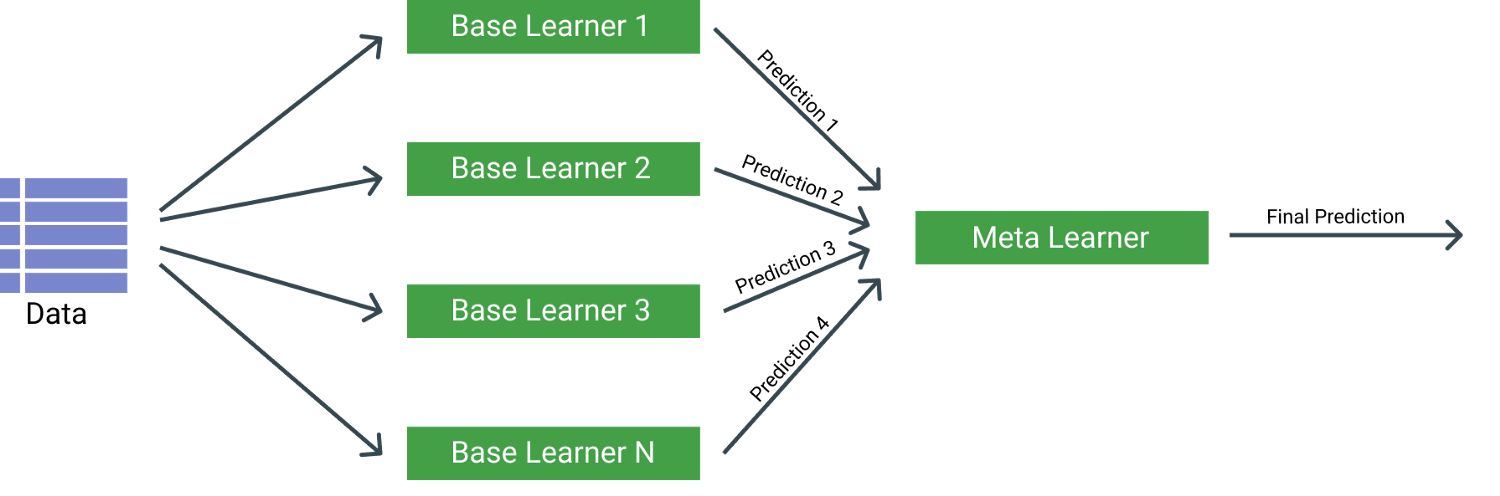

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error


# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models as pipelines
linear_pipeline = Pipeline([('model', LinearRegression())])
ridge_pipeline = Pipeline([('model', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline([('model', Lasso(alpha=0.1))])
huber_pipeline = Pipeline([('model', HuberRegressor())])
ransac_pipeline = Pipeline([('model', RANSACRegressor())])

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('linear', linear_pipeline),
        ('ridge', ridge_pipeline),
        ('lasso', lasso_pipeline),
        ('huber', huber_pipeline),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('linear',
                               Pipeline(steps=[('model', LinearRegression())])),
                              ('ridge', Pipeline(steps=[('model', Ridge())])),
                              ('lasso',
                               Pipeline(steps=[('model', Lasso(alpha=0.1))])),
                              ('huber',
                               Pipeline(steps=[('model', HuberRegressor())])),
                              ('ransac',
                               Pipeline(steps=[('model', RANSACRegressor())]))],
                  final_estimator=LinearRegression())

In [19]:

# Predict using the stacking model
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)
median_ae_stack = median_absolute_error(y_test, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking,0.396146,0.320597,0.266159,0.024406,0.999994


### Stacking with Features (`passthrough=True`)

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.datasets import make_regression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models as pipelines
linear_pipeline = Pipeline([('model', LinearRegression())])
ridge_pipeline = Pipeline([('model', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline([('model', Lasso(alpha=0.1))])
huber_pipeline = Pipeline([('model', HuberRegressor())])
ransac_pipeline = Pipeline([('model', RANSACRegressor())])

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor with passthrough
stacking_regressor = StackingRegressor(
    estimators=[
        ('linear', linear_pipeline),
        ('ridge', ridge_pipeline),
        ('lasso', lasso_pipeline),
        ('huber', huber_pipeline),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=meta_model,
    cv=5,
    passthrough=True  # Include original features in the meta-model
)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('linear',
                               Pipeline(steps=[('model', LinearRegression())])),
                              ('ridge', Pipeline(steps=[('model', Ridge())])),
                              ('lasso',
                               Pipeline(steps=[('model', Lasso(alpha=0.1))])),
                              ('huber',
                               Pipeline(steps=[('model', HuberRegressor())])),
                              ('ransac',
                               Pipeline(steps=[('model', RANSACRegressor())]))],
                  final_estimator=LinearRegression(), passthrough=True)

In [21]:

# Predict using the stacking model
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)
median_ae_stack = median_absolute_error(y_test, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking with Features',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking with Features,0.400838,0.322762,0.275556,0.025167,0.999994
